# Tabula rasa

- [Administrativia](#Administrativia)
- [Motivation](#Motivation)
- [Project Structure](#Project-Structure)
- [IDE](#IDE)
- [Depenpency Management](#Depenpency-Management)
- [Pre-commit Hooks](#Pre-commit-Hooks)
- [Tooling](#Tooling)
- [CI](#CI)

## Administrativia

- Правила проведения вебинара
- Архив с материалами занятия
- Jupyter notebook
- Запись вебинара
- Домашнее задание
- Взаимодействие вне занятий
- Медленный старт
- Переносы занятий
- Каникулы

## Motivation

#### Goals
- разобрать стандартный шаблон структуры Python проекта;
- рассмотреть различные инструменты по управлению зависимостями;
- научиться создавать удобное окружение для разработки.

#### Homework
__Анализатор логов__

реализовать сервис, формирующий статистический отчет о характеристиках запросов к сервису (среднее, медианное время ответа и т.п.) на основании парсинга логов, которые пишет nginx. Оформить проект согласно всем лучшим практикам, подключить CI, линетры, чекеры, написать Dockerfile и README

<div>
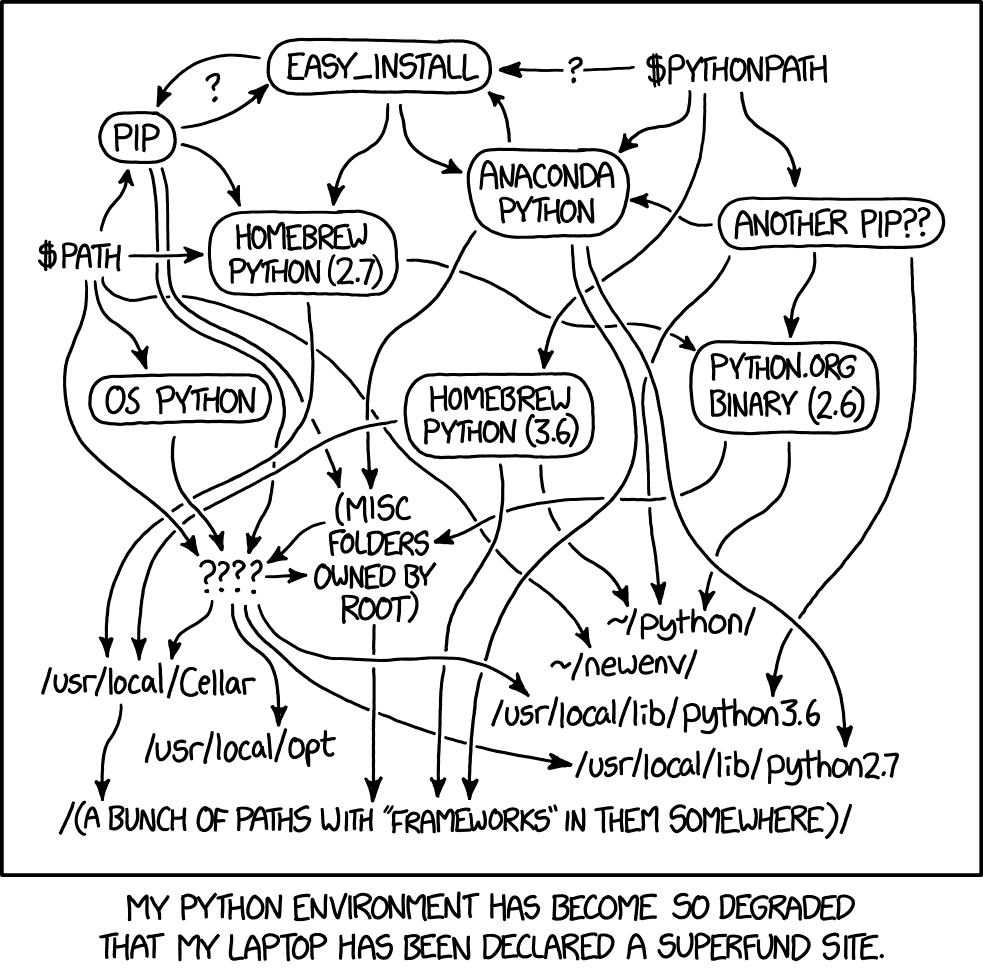
</div>

## Project Structure

#### One-off script

In [ ]:
helloworld/
│
├── .gitignore
├── helloworld.py
├── LICENSE
├── README.md
├── requirements.txt
├── setup.py
└── tests.py

#### Application with Internal Packages

In [ ]:
helloworld/
│
├── bin/
│
├── docs/
│   ├── hello.md
│   └── world.md
│
├── helloworld/
│   ├── __init__.py
│   ├── runner.py
│   ├── hello/
│   │   ├── __init__.py
│   │   ├── hello.py
│   │   └── helpers.py
│   │
│   └── world/
│       ├── __init__.py
│       ├── helpers.py
│       └── world.py
│
├── data/
│   ├── input.csv
│   └── output.xlsx
│
├── tests/
│   ├── hello
│   │   ├── helpers_tests.py
│   │   └── hello_tests.py
│   │
│   └── world/
│       ├── helpers_tests.py
│       └── world_tests.py
│
├── .gitignore
├── LICENSE
└── README.md

#### Cookiecutter

https://cookiecutter.readthedocs.io/en/stable/README.html#available-templates

Answer few questions:

In [ ]:
full_name [Audrey Roy Greenfeld]: Sebastian Witowski
email [audreyr@example.com]: sebastian@switowski.com
github_username [audreyr]: switowski
project_name [Python Boilerplate]: Python workshop example
project_slug [python_workshop_example]:
project_short_description [Python Boilerplate contains all the boilerplate you need to create a Python package.]:
pypi_username [switowski]:
version [0.1.0]:
use_pytest [n]: y
use_pypi_deployment_with_travis [y]:
add_pyup_badge [n]:
Select command_line_interface:
1 - Click
2 - Argparse
3 - No command-line interface
Choose from 1, 2, 3 [1]: 1
create_author_file [y]: y
Select open_source_license:
1 - MIT license
2 - BSD license
3 - ISC license
4 - Apache Software License 2.0
5 - GNU General Public License v3
6 - Not open source
Choose from 1, 2, 3, 4, 5, 6 [1]: 1

Get result:

In [ ]:
python_workshop_example/
├── AUTHORS.rst
├── CONTRIBUTING.rst
├── HISTORY.rst
├── LICENSE
├── MANIFEST.in
├── Makefile
├── README.rst
├── docs
│   ├── Makefile
│   ├── authors.rst
│   ├── conf.py
│   ├── contributing.rst
│   ├── history.rst
│   ├── index.rst
│   ├── installation.rst
│   ├── make.bat
│   ├── readme.rst
│   └── usage.rst
├── python_workshop_example
│   ├── __init__.py
│   ├── cli.py
│   └── python_workshop_example.py
├── requirements_dev.txt
├── setup.cfg
├── setup.py
├── tests
│   ├── __init__.py
│   └── test_python_workshop_example.py
└── tox.ini

#### src vs flat layout

In [ ]:
# flat
.
├── README.md
├── pyproject.toml
├── setup.py
├── awesome_package/
│   ├── __init__.py
│   └── module.py
└── tools/
    ├── generate_awesomeness.py
    └── decrease_world_suck.py

In [ ]:
# src

.
├── README.md
├── pyproject.toml
├── setup.py
├── src/
│    └── awesome_package/
│       ├── __init__.py
│       └── module.py
└── tools/
    ├── generate_awesomeness.py
    └── decrease_world_suck.py

- The src layout requires installation of the project to be able to run its code, and the flat layout does not.
- The src layout helps prevent accidental usage of the in-development copy of the code.
    - This is relevant since the Python interpreter includes the current working directory as the first item on the import path. This means that if an import package exists in the current working directory with the same name as an installed import package, the variant from the current working directory will be used. This can lead to subtle misconfiguration of the project’s packaging tooling, which could result in files not being included in a distribution.
    - The src layout helps avoid this by keeping import packages in a directory separate from the root directory of the project, ensuring that the installed copy is used.
- The src layout helps enforce that an editable installation is only able to import files that were meant to be importable.

## IDE

- Desktop
    - VSCode
    - IDEA
    - PyCharm
- Terminal
    - vim

## Depenpency Management

#### Versioning

__Problem__:  what if new version of dependency introduces a breaking change?

__Solution__: "freeze" concrete versions

#### Vendoring

__Problem__:  what if 3rd party dependency becomes unavailable?

__Solution__: copy depenencies locally

#### Project configuration

__setup.cfg__
is an ini file that contains option defaults for setup.py commands. setup.py serves two primary functions:

- It’s the file where various aspects of your project are configured. The primary feature of setup.py is that it contains a global setup() function. The keyword arguments to this function are how specific details of your project are defined. 
- It’s the command line interface for running various commands that relate to packaging tasks. 

In [ ]:
# setup.cfg
[metadata]
name = my_package
version = attr: my_package.VERSION
author = Josiah Carberry
author_email = josiah_carberry@brown.edu
description = My package description
long_description = file: README.rst, CHANGELOG.rst, LICENSE.rst
keywords = one, two
license = BSD-3-Clause
classifiers =
    Framework :: Django
    Programming Language :: Python :: 3

[options]
zip_safe = False
include_package_data = True
packages = find:
python_requires = >=3.8
install_requires =
    requests
    importlib-metadata; python_version<"3.10"

__pyproject.toml__
is configuration file standard defined in PEP 518:

This PEP specifies how Python software packages should specify what build dependencies they have in order to execute their chosen build system. As part of this specification, a new configuration file is introduced for software packages to use to specify their build dependencies (with the expectation that the same configuration file will be used for future configuration details)

#### Poetry

By default, Python packages are installed with pip install. In reality nobody uses it this way. It installs all your dependencies into one version of Python interpreter which messes up dependencies.

It’s a good practice to install dependencies per project. So each project only contains dependencies that are required for it, and nothing more. This also prevents conflicts of versions of different packages that are required for different projects.

To solve this problem, there is a concept of virtual environments. So each project has it’s own virtual environment with fixed Python version and fixed dependencies specific for this project.

Virtual environments evolved from venv, virtualenv, virtualenvwrapper to pipenv, and poetry

In [ ]:
# pyproject.toml
[tool.poetry]
name = "toy-project"
version = "0.1.0"
description = ""
authors = ["Batman"]

[tool.poetry.dependencies]
python = "^3.10.4"

[tool.poetry.dev-dependencies]
pytest = "^5.2"

[build-system]
requires = ["poetry-core>=1.0.0a5"]
build-backend = "poetry.core.masonry.api"

#### uv

https://astral.sh/blog/uv

uv is an extremely fast Python package installer and resolver, written in Rust, and designed as a drop-in replacement for pip and pip-tools workflows.

In [ ]:
uv venv  # Create a virtual environment at .venv.

uv pip install flask                # Install Flask.
uv pip install -r requirements.txt  # Install from a requirements.txt file.
uv pip install -e .                 # Install the current project in editable mode.
uv pip install "package @ ."        # Install the current project from disk.
uv pip install "flask[dotenv]"      # Install Flask with "dotenv" extra.

uv pip compile requirements.in -o requirements.txt    # Read a requirements.in file.
uv pip compile pyproject.toml -o requirements.txt     # Read a pyproject.toml file.
uv pip compile setup.py -o requirements.txt           # Read a setup.py file.
echo flask | uv pip compile - -o requirements.txt     # Read from stdin.
uv pip freeze | uv pip compile - -o requirements.txt  # Lock the current environment.

## Pre-commit Hooks

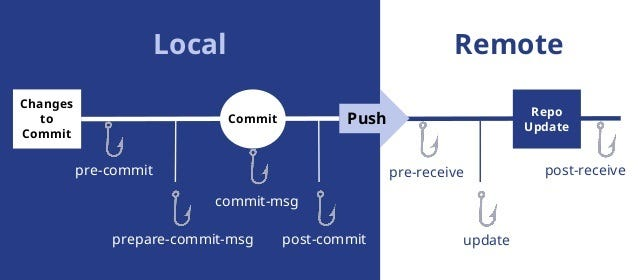

https://pre-commit.com

In [ ]:
pre-commit sample-config > .pre-commit-config.yaml

In [ ]:
# See https://pre-commit.com for more information
# See https://pre-commit.com/hooks.html for more hooks
repos:
-   repo: https://github.com/pre-commit/pre-commit-hooks
    rev: v2.4.0
    hooks:
    -   id: trailing-whitespace
    -   id: end-of-file-fixer
    -   id: check-yaml
    -   id: check-added-large-files

In [ ]:
pre-commit run --all-files

In [ ]:
# Pre-commits hooks needs to be installed
pre-commit install

## Tooling

#### pyenv for Python version management

https://github.com/pyenv/pyenv

In [1]:
! pyenv versions

* system (set by /root/.pyenv/version)


In [2]:
! pyenv install --list | head -10

Available versions:
  2.1.3
  2.2.3
  2.3.7
  2.4.0
  2.4.1
  2.4.2
  2.4.3
  2.4.4
  2.4.5
sed: couldn't write 19 items to stdout: Broken pipe
/usr/bin/grep: write error: Broken pipe


#### pytest for testing

https://docs.pytest.org

Comes as a default testing framework for Poetry

In [ ]:
poetry run pytest
# or
pytest

Coverage:

In [ ]:
poetry add --group dev pytest-cov
pytest --cov=toy_project tests/

#### flake8 for linting

https://github.com/PyCQA/flake8

In [ ]:
# setup.cfg or .flake8
[flake8]
extend-ignore = E203

In [ ]:
flake8 .

#### black for code formatting

https://black.readthedocs.io/en/stable/

In [ ]:
# pyproject.toml
[tool.black]
line-length = 120
target-version = ['py38']
include = '\.pyi?$'
exclude = '''

(
  /(
      \.eggs         # exclude a few common directories in the
    | \.git          # root of the project
    | \.hg
    | \.mypy_cache
    | \.tox
    | \.venv
    | _build
    | buck-out
    | build
    | dist
  )/
  | foo.py           # also separately exclude a file named foo.py in
                     # the root of the project
)
'''

In [ ]:
black .

#### isort for sorting imports

https://pycqa.github.io/isort/

In [ ]:
poetry add --group dev isort

In [ ]:
# pyproject.toml
[tool.isort]
multi_line_output = 3
include_trailing_comma = true
force_grid_wrap = 0
use_parentheses = true
line_length = 79

#### mypy for type annotations

https://mypy.readthedocs.io/en/stable/

In [ ]:
poetry add --group dev mypy

In [ ]:
# pyproject.toml
[tool.mypy]
python_version = "3.10"
disallow_untyped_defs = true
show_error_codes = true
no_implicit_optional = true
warn_return_any = true
warn_unused_ignores = true
exclude = ["scripts", "docs", "test"]
disable_error_code = ["name-defined"]
ignore_missing_imports = true

#### pyupgrade for syntax changes

https://github.com/asottile/pyupgrade

In [ ]:
poetry add --group dev pyupgrade

#### ruff: the fastest Python linter and auto-formatter

https://docs.astral.sh/ruff/

Could replace isort, pyupgrade, flake8, pydocstyle, etc...

In [ ]:
poetry add --group dev ruff

In [ ]:
ruff check your_file.py

In [ ]:
# pyproject.toml
[tool.ruff]
line-length = 100  # defaults to 88 like black
target-version = "py39"  # the python version to target, useful when considering code upgrades, defaults to "py310"

select = [
  "E",   # pycodestyle
  "F",   # pyflakes
  "UP",  # pyupgrade,
  "I",   # isort
]

# if you want to configure a particular plugin, you can do it in 
# a subsection, it is usually the same configuration that the plugin
# supports
[tool.ruff.isort]
...

#### Makefile for shortcuts

https://makefiletutorial.com

## CI

#### Gitlab CI

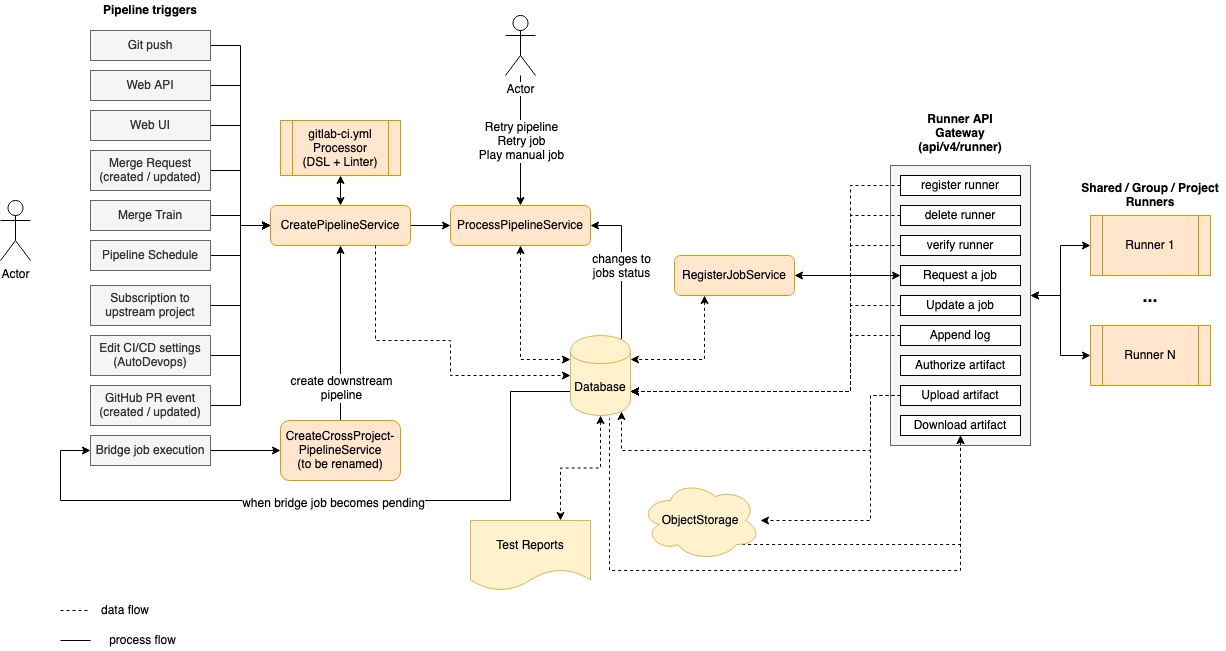

#### Github Actions

### References

* https://realpython.com/python-application-layouts/
* https://packaging.python.org/en/latest/discussions/src-layout-vs-flat-layout/
* https://docs.python-guide.org/writing/structure/
* https://dagster.io/blog/python-project-best-practices
* https://towardsdatascience.com/python-and-the-module-search-path-e71ae7a7e65f
* https://newbedev.com/where-is-python-s-sys-path-initialized-from
* https://towardsdatascience.com/python-the-system-path-and-how-conda-and-pyenv-manipulate-it-234f8e8bbc3e
* https://mitelman.engineering/blog/python-best-practice/automating-python-best-practices-for-a-new-project/
* https://snarky.ca/what-the-heck-is-pyproject-toml/
* https://www.marwandebbiche.com/posts/python-package-tooling/
* https://docs.github.com/en/actions/automating-builds-and-tests/building-and-testing-python
* https://www.nijho.lt/post/best-python-dev-tooling/
* https://lewoudar.medium.com/python-lint-code-faster-91f0e04ee6fc
* https://realpython.com/dependency-management-python-poetry/
* https://docs.gitlab.com/ee/ci/
* https://makefiletutorial.com